In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import autograd
import torch.nn.functional as F
import random

In [42]:
images1 = np.load("cs475_project_data/images.npy")
num_images, height, width = images1.shape
images1 = images1.reshape(num_images, height*width) #reshape
labels1 = np.load("cs475_project_data/labels.npy")

images = torch.from_numpy(images1)
labels = torch.from_numpy(labels1).type(torch.IntTensor) # make sure int values

images = images.type(torch.DoubleTensor)
images = (images - torch.mean(images))/torch.std(images)
# the above normalizes the data based on z score

In [43]:
# split data
train_data = images[:40000]
dev_data = images[40000:45000]
test_data = images[45000:]

train_labels = labels[:40000]
dev_labels = labels[40000:45000]
test_labels = labels[45000:]

HEIGHT = 26
WIDTH = 26
NUM_CLASSES = 5
NUM_OPT_STEPS = 1500

In [13]:
class FeedForwardNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(HEIGHT*WIDTH, 300)
        self.linear2 = torch.nn.Linear(300, 100)
        self.linear3 = torch.nn.Linear(100, NUM_CLASSES)
    def forward(self, x):
        first = F.relu(self.linear1(x)).clamp(min=0)
        #first = F.dropout(first, training=True)
        second = F.relu(self.linear2(first)).clamp(min=0)
        y_pred = F.relu(self.linear3(second)).clamp(min=0)
        return y_pred

In [14]:
model = FeedForwardNN()
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [15]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_data.shape[0], size=batch_size, replace=False)
    temp = train_data.numpy()
    temp1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(temp[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(temp1[i].astype(np.int)))
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [16]:
def approx_train_accuracy():
    #model.eval()
    i = np.random.choice(train_data.shape[0], size=1000, replace=False)
    tempy = train_data.numpy()
    tempy1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy1[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

def val_accuracy():
    #model.eval()
    i = np.random.choice(dev_data.shape[0], size=5000, replace=False)
    tempy2 = dev_data.numpy()
    tempy3 = dev_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy2[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy3[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

In [17]:
train_accs, val_accs = [], []
iterations = []
print("Using 3 layer NN with parameters described in code above.")
for i in range(NUM_OPT_STEPS):
    train(1000)
    if i % 100 == 0:
        iterations.append(i)
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

Using 3 layer NN with parameters described in code above.
     0  0.43  0.43
   100  0.87  0.83
   200  0.89  0.85
   300  0.92  0.87
   400  0.95  0.87
   500  0.95  0.87
   600  0.97  0.87
   700  0.98  0.87
   800  0.99  0.87
   900  0.99  0.87
  1000  1.00  0.87
  1100  1.00  0.87
  1200  0.99  0.87
  1300  0.99  0.87
  1400  0.99  0.87


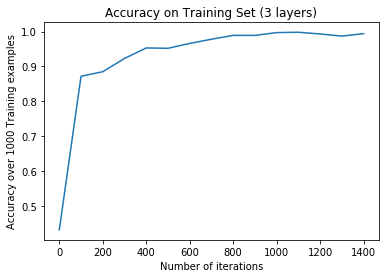

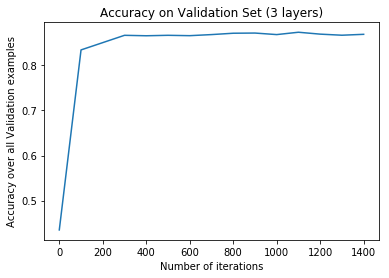

In [18]:
plt.plot(iterations, train_accs)
plt.title("Accuracy on Training Set (3 layers)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over 1000 Training examples")
plt.show()

plt.plot(iterations, val_accs)
plt.title("Accuracy on Validation Set (3 layers)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over all Validation examples")
plt.show()

In [19]:
class FeedForwardNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(HEIGHT*WIDTH, 300)
        self.linear2 = torch.nn.Linear(300, 150)
        self.linear3 = torch.nn.Linear(150, 50)
        self.linear4 = torch.nn.Linear(50, NUM_CLASSES)
    def forward(self, x):
        first = F.relu(self.linear1(x)).clamp(min=0)
        #first = F.dropout(first, training=True)
        second = F.relu(self.linear2(first)).clamp(min=0) # MAYBE CLAMP THE RELU INSTEAD OF THE LINEAR??
        third = F.relu(self.linear3(second)).clamp(min=0)
        y_pred = F.relu(self.linear4(third)).clamp(min=0)
        return y_pred

In [20]:
model = FeedForwardNN()

optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [21]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_data.shape[0], size=batch_size, replace=False)
    temp = train_data.numpy()
    temp1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(temp[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(temp1[i].astype(np.int)))
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [22]:
def approx_train_accuracy():
    #model.eval()
    i = np.random.choice(train_data.shape[0], size=1000, replace=False)
    tempy = train_data.numpy()
    tempy1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy1[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

def val_accuracy():
    #model.eval()
    i = np.random.choice(dev_data.shape[0], size=5000, replace=False)
    tempy2 = dev_data.numpy()
    tempy3 = dev_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy2[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy3[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

In [23]:
train_accs, val_accs = [], []
iterations = []
print("Using 4 layer NN with parameters described above")
for i in range(NUM_OPT_STEPS):
    train(1000)
    if i % 100 == 0:
        iterations.append(i)
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

Using 4 layer NN with parameters described above
     0  0.43  0.43
   100  0.84  0.83
   200  0.90  0.86
   300  0.92  0.87
   400  0.93  0.86
   500  0.97  0.87
   600  0.97  0.87
   700  0.98  0.87
   800  0.99  0.87
   900  0.99  0.87
  1000  0.99  0.87
  1100  0.98  0.87
  1200  0.99  0.87
  1300  0.99  0.86
  1400  0.99  0.87


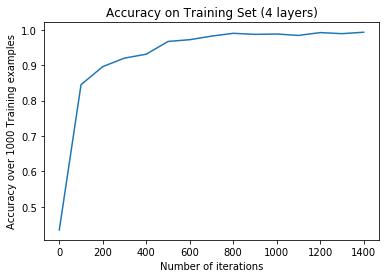

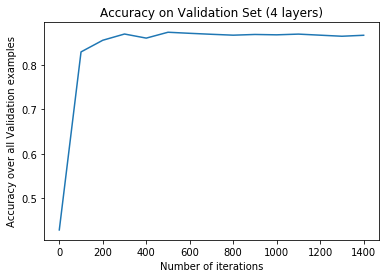

In [24]:
plt.plot(iterations, train_accs)
plt.title("Accuracy on Training Set (4 layers)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over 1000 Training examples")
plt.show()

plt.plot(iterations, val_accs)
plt.title("Accuracy on Validation Set (4 layers)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over all Validation examples")
plt.show()

In [25]:
class FeedForwardNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(HEIGHT*WIDTH, 300)
        self.linear2 = torch.nn.Linear(300, 100)
        self.linear3 = torch.nn.Linear(100, NUM_CLASSES)
    def forward(self, x):
        first = F.relu(self.linear1(x)).clamp(min=0)
        first = F.dropout(first, training=True)
        second = F.relu(self.linear2(first)).clamp(min=0)
        y_pred = F.relu(self.linear3(second)).clamp(min=0)
        return y_pred

In [26]:
model = FeedForwardNN()

optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [27]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_data.shape[0], size=batch_size, replace=False)
    temp = train_data.numpy()
    temp1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(temp[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(temp1[i].astype(np.int)))
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [28]:
def approx_train_accuracy():
    model.eval()
    i = np.random.choice(train_data.shape[0], size=1000, replace=False)
    tempy = train_data.numpy()
    tempy1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy1[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

def val_accuracy():
    model.eval()
    i = np.random.choice(dev_data.shape[0], size=5000, replace=False)
    tempy2 = dev_data.numpy()
    tempy3 = dev_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy2[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy3[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

In [29]:
train_accs, val_accs = [], []
iterations = []
print("Using 3 layer NN with dropout")
for i in range(NUM_OPT_STEPS):
    train(1000)
    if i % 100 == 0:
        iterations.append(i)
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

Using 3 layer NN with dropout
     0  0.37  0.39
   100  0.82  0.81
   200  0.87  0.84
   300  0.85  0.85
   400  0.90  0.85
   500  0.90  0.85
   600  0.92  0.85
   700  0.93  0.86
   800  0.91  0.86
   900  0.93  0.85
  1000  0.94  0.87
  1100  0.94  0.86
  1200  0.93  0.86
  1300  0.94  0.86
  1400  0.94  0.86


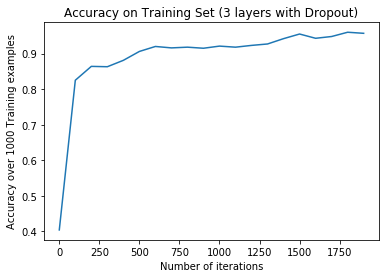

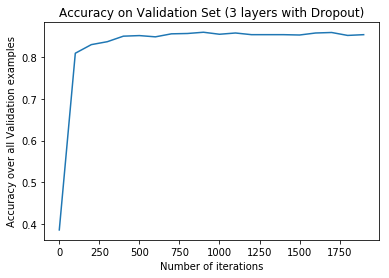

In [119]:
plt.plot(iterations, train_accs)
plt.title("Accuracy on Training Set (3 layers with Dropout)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over 1000 Training examples")
plt.show()

plt.plot(iterations, val_accs)
plt.title("Accuracy on Validation Set (3 layers with Dropout)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over all Validation examples")
plt.show()

In [114]:
class FeedForwardNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(HEIGHT*WIDTH, 300)
        self.linear2 = torch.nn.Linear(300, 100)
        self.linear3 = torch.nn.Linear(100, NUM_CLASSES)
    def forward(self, x):
        first = F.relu(self.linear1(x)).clamp(min=0)
        first = F.dropout(first, training=True)
        second = F.relu(self.linear2(first)).clamp(min=0)
        y_pred = F.relu(self.linear3(second)).clamp(min=0)
        return y_pred

In [115]:
model = FeedForwardNN()
NUM_OPT_STEPS = 2000
optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [116]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_data.shape[0], size=batch_size, replace=False)
    temp = train_data.numpy()
    temp1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(temp[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(temp1[i].astype(np.int)))
    optimizer.zero_grad()
    y_hat_ = model(x)
    #loss = nn.MultiLabelMarginLoss()
    loss = F.multi_margin_loss(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]

In [117]:
def approx_train_accuracy():
    model.eval()
    i = np.random.choice(train_data.shape[0], size=1000, replace=False)
    tempy = train_data.numpy()
    tempy1 = train_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy1[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

def val_accuracy():
    model.eval()
    i = np.random.choice(dev_data.shape[0], size=5000, replace=False)
    tempy2 = dev_data.numpy()
    tempy3 = dev_labels.numpy()
    x = autograd.Variable(torch.from_numpy(tempy2[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(tempy3[i].astype(np.int)))
    y_hat_ = model(x)
    #print(y)
    y = y.data.numpy()
    y_hat_ = y_hat_.data.numpy()
    y_hat_ = np.argmax(y_hat_, axis=1)
    #print(y_hat_)
    return (y == y_hat_).astype(np.float).mean()

In [118]:
train_accs, val_accs = [], []
iterations = []
print("Using 3 layer NN with dropout")
for i in range(NUM_OPT_STEPS):
    train(1000)
    if i % 100 == 0:
        iterations.append(i)
        train_accs.append(approx_train_accuracy())
        val_accs.append(val_accuracy())
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))

Using 3 layer NN with dropout
     0  0.40  0.39
   100  0.82  0.81
   200  0.86  0.83
   300  0.86  0.84
   400  0.88  0.85
   500  0.91  0.85
   600  0.92  0.85
   700  0.92  0.86
   800  0.92  0.86
   900  0.92  0.86
  1000  0.92  0.85
  1100  0.92  0.86
  1200  0.92  0.85
  1300  0.93  0.85
  1400  0.94  0.85
  1500  0.95  0.85
  1600  0.94  0.86
  1700  0.95  0.86
  1800  0.96  0.85
  1900  0.96  0.85


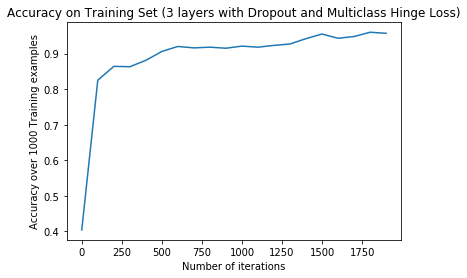

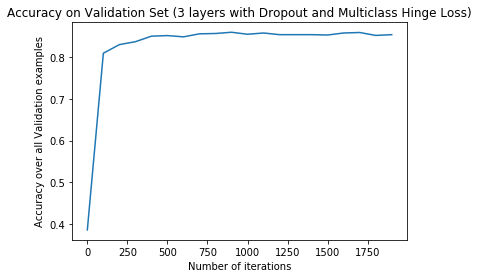

In [120]:
plt.plot(iterations, train_accs)
plt.title("Accuracy on Training Set (3 layers with Dropout and Multiclass Hinge Loss)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over 1000 Training examples")
plt.show()

plt.plot(iterations, val_accs)
plt.title("Accuracy on Validation Set (3 layers with Dropout and Multiclass Hinge Loss)")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy over all Validation examples")
plt.show()

The best validation accuracy achieved was 87% with multiple models. The 3 layer NN, 4 layer NN, 3 layer NN with dropout all resulted in this accuracy. The batch size was 1000 and the learning rate was .001 in all cases. I needed 1500 steps to reach this accuracy, and training took about 2 minutes. 